#  -----------------------------     Twitter Sentiment Analysis       --------------------------------


# 1:Import modules

In [2]:
import pandas as pd
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
# 1:Import modules
from nltk.corpus import stopwords   
from nltk import PorterStemmer   
from nltk.tokenize import word_tokenize
# regular expression
import re      # matching the words in any content
# %run DataPreprocessing.ipynb
import seaborn as sns
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 2: Read and Load the Dataset

In [3]:
## 2: Read and Load the Datasetfile_path = 'Twitter Data/Twitter_Data_1600000.csv'
twitter_data = pd.read_csv(file_path, encoding ='latin')
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
# Define columns names
column_names = ['target','ids','date','flag','user','text']
# add columns names to the dataFrame
twitter_data.columns = column_names
# twitter_data = pd.read_csv(file_path, names = column_names, encoding = 'latin')
(row,col) = twitter_data.shape
print(f"Number of rows: {row}\nNumber of columns: {col}")
twitter_data.head()

Number of rows: 1599999
Number of columns: 6


,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## 3: Exploratory Data Analysis(EDA)

### 3.1: Display Basic Information:

In [5]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   ids     1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
twitter_data.describe()

,target,ids
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [7]:
twitter_data.head()

,target,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [8]:
# Check the missing Values
twitter_data.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [9]:
# Unique values
twitter_data.nunique()

target          2
ids       1598314
date       774362
flag            1
user       659775
text      1581465
dtype: int64

In [10]:
# Value Count
twitter_data['target'].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

In [11]:
twitter_data.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [12]:
twitter_data.shape

(1599999, 6)

In [13]:
twitter_data['text'].isnull().sum()

0

## 2: Data Preprocessing

## 2.1: Selecting the text and target colum for our future analysis

In [14]:
# only two columns to need in futrure to sentiment analysis target and text
data = twitter_data[['target', 'text']]

### 2.2: Replacing the target's value  
######  Know that  here in target columns has two values 0 for negative and 4 for positive tweets, so here i'm replace the value 4 to 1

In [15]:
# Replaceing the target value 4 to 1
data.replace({'target':{4:1}},inplace = True)
data['target'].value_counts()

C:\Users\KAMAL CHANDRA\AppData\Local\Temp\ipykernel_5040\2589728098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace({'target':{4:1}},inplace = True)


target
1    800000
0    799999
Name: count, dtype: int64

#### 0 ------>Negative Tweets

#### 1 ------>Positive Tweets

In [16]:
# Check here all unique value store in target columns
data['target'].unique()

array([0, 1], dtype=int64)

## 2.4: Seprating positive and negative tweets

###### Dividing the data in two seprate parts 1's is positive and 2'nd is negative

In [17]:
# store only positive tweets here
data_pos = data[data['target'] == 1]
# -------------------------------------------
# Store only negative tweets in here
data_neg = data[data['target'] == 0]

In [18]:
# view top few positive tweets 
print(data_pos.shape)
data_pos.head()

(800000, 2)


,target,text
799999,1,I LOVE @Health4UandPets u guys r the best!!
800000,1,im meeting up with one of my besties tonight! ...
800001,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,1,Being sick can be really cheap when it hurts t...
800003,1,@LovesBrooklyn2 he has that effect on everyone


In [19]:
# view top few negative tweets
print(data_neg.shape)
data_neg.head()

(799999, 2)


,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


### 2.5: Taking 10% data of twitter_data 

In [20]:
# half data are take for working 
data_pos = data_pos.iloc[:int(80000)]
data_neg = data_neg.iloc[:int(80000)]

## 2.6: Combilning positive and negative tweet

In [21]:
# Combined the both tweets postive and negative and store in dataset
dataset = pd.concat([data_neg,data_pos])
# view tp few tweets
dataset.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [22]:
# view last few tweets
dataset.tail()

,target,text
879994,1,"morn all, waitin 4 the sun 2 reappear, so cool..."
879995,1,Why am I still up at 3am? Good grief and good ...
879996,1,Morning world. Taking my parents out for a me...
879997,1,drive ins are fun...just saying.
879998,1,i like my twitter page background


In [23]:
# display the 
dataset.shape

(160000, 2)

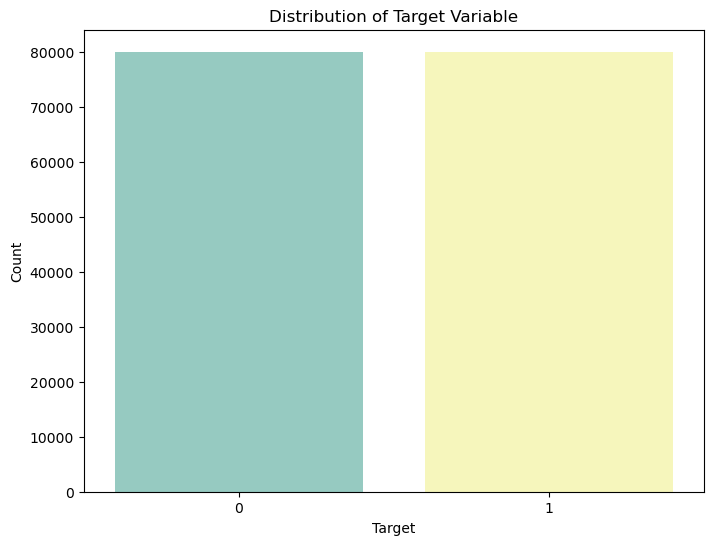

In [24]:
# # Visualize distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=dataset, palette="Set3")
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [25]:
dataset['target'].value_counts() 

target
0    80000
1    80000
Name: count, dtype: int64

## 2: Stemming

In [26]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## 2.1: Defined a function for Stemming of the text

In [27]:

# Instantiate the PorterStemmer
port_stem = PorterStemmer()


In [28]:
# Function 
def stemming(content):
    # Clean non-alphabetic characters and convert to lowercase
    cleaned_content = re.sub('[^a-zA-Z]', ' ', content)
    cleaned_content = cleaned_content.lower()

    # Tokenize the cleaned content
    tokenized_content = word_tokenize(cleaned_content)

    # Apply stemming and remove stopwords
    stemmed_content = [port_stem.stem(word)
                       for word in tokenized_content
                       if word.lower() not in stopwords.words('english')]

    # Join the stemmed words back into a single string
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

# create a new column Stemmed_content and apply the text coulumn stemming function to clean the data 
# dataset['Stemmed_content']  = dataset['text'].apply(stemming)
# after apply the stemming function on text column then display top 10 rows to sample data seeing
# dataset.head(10)


In [31]:
# create a new column and apply steeming function
dataset['Stemmed_content'] = dataset['text'].apply(stemming)

# And print top few rows
dataset.head()

,target,text,Stemmed_content
0,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
4,0,@Kwesidei not the whole crew,kwesidei whole crew


## 2.2: Applying lemmatizer

In [32]:
# nltk.download('wordnet')

In [ ]:
# Apply lemmatizer for words are seprated in the form of list and simpifying the 
# each word in seprateed by commas......

In [33]:

# Initialize the WordNetLemmatizer
lm = WordNetLemmatizer()

# Define function
def lemmatizing(content):
    # Tokenize the content
    tokens = nltk.word_tokenize(content)
    
    # Lemmatize each token
    lemmatized_tokens = [lm.lemmatize(token) for token in tokens]
    
    # Join the lemmatized tokens back into a single string
    lemmatized_content = ', '.join(lemmatized_tokens)
    
    return lemmatized_content

In [34]:
# Create a new cloumn which name is Lemmatize_content it store the Stemmed_content data to seprated by commas
dataset['Lemmatize_content'] = dataset['Stemmed_content'].apply(lemmatizing)
# Display the few five rows to displaying the apply Lemmatized_content 
dataset.head() 

,target,text,Stemmed_content,Lemmatize_content
0,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...,"upset, updat, facebook, text, might, cri, resu..."
1,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...,"kenichan, dive, mani, time, ball, manag, save,..."
2,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire,"whole, bodi, feel, itchi, like, fire"
3,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see,"nationwideclass, behav, mad, see"
4,0,@Kwesidei not the whole crew,kwesidei whole crew,"kwesidei, whole, crew"


##  WordCloud for negative and positive tweets

In [35]:
# 
data_pos=dataset[dataset['target']==1]
data_neg=dataset[dataset['target']==0]

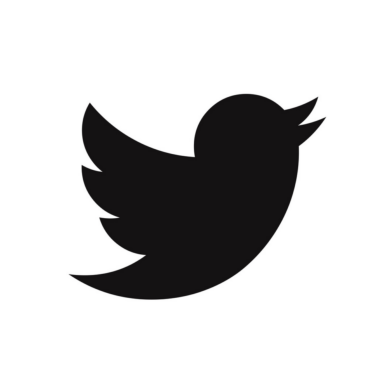

In [36]:
# Load the Twitter bird mask image
twitter_mask = np.array(Image.open("images/twitter.png"))
# show image
plt.imshow(twitter_mask)
plt.axis("off")
plt.show()

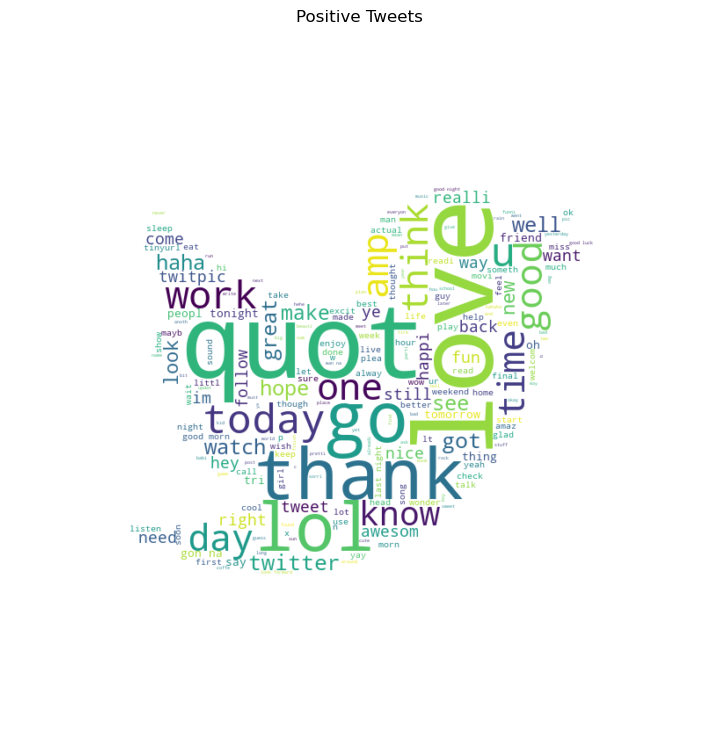

In [37]:
# For nagatib=ve tweets
wcpos = WordCloud(width = 800, height=800,
                     mask = twitter_mask,
               random_state=5
              ,background_color = 'white').generate(' '.join(data_pos['Lemmatize_content']))
plt.figure(figsize=(10,9))
plt.imshow(wcpos,interpolation="bilinear")
plt.title('Positive Tweets')
plt.savefig('wc_pos_tweets')
plt.axis("off")
plt.show()

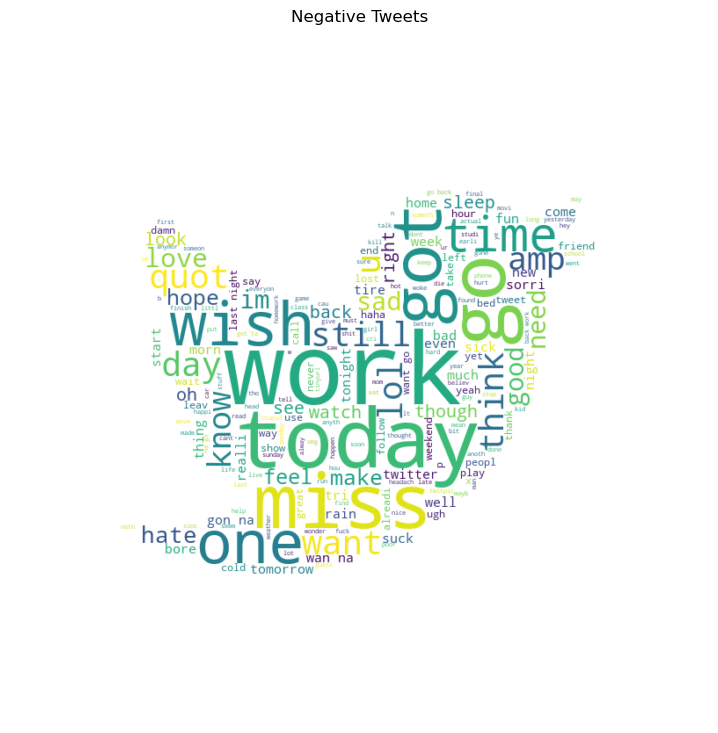

In [38]:
# For nagatib=ve tweets
data_neg.loc[:,'Stemmed_content'] = data_neg['Stemmed_content'].astype(str)
wcneg = WordCloud(width = 800, height=800,
                     mask = twitter_mask,
                  random_state = 2
              ,background_color = 'white').generate(' '.join(data_neg['Stemmed_content']))
plt.figure(figsize=(10,9))
plt.imshow(wcneg,interpolation="bilinear")
plt.title('Negative Tweets')
plt.savefig('wc_neg_tweets')
plt.axis("off")
plt.show()

### Make a csv file and store data

In [ ]:
# Assuming your dataset is named 'dataset'
# dataset.to_csv('processed_data.csv', index=False)
# Store file in your system 
dataset.to_csv('processed_data_stemmed.csv', index = False)
# Save DataFrame to Excel
# dataset.to_excel('processed_data_table.xlsx', index=False)### Make a csv file and store data